In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

from tueplots import bundles
from tueplots.constants.color import rgb

cwd = os.getcwd()
REPO_ROOT = os.path.realpath(os.path.join(cwd, os.pardir))
sys.path.insert(1, os.path.join(REPO_ROOT, 'src'))
from plotting_functions import read_data, get_mean_delays


In [2]:
gain_dict = read_data('../dat/convergence', 1, compare_gains=True)
dict_mean_delays = get_mean_delays(gain_dict, 180, True)

no_wait
theoretical_max_gain


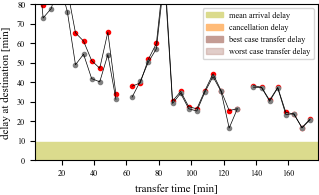

In [3]:
mean_train_delay = 9.462575828807317
max_transfer_time = 180
bucket_size = 5

plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))
#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update()
plt.rcParams['font.serif'] = 'Times New Roman'  # Or another available font
plt.rcParams['font.family'] = 'serif'
#plt.rcParams.update({'font.size': 15})

worst_case = np.array(dict_mean_delays['no_wait']["mean_delay"])
best_case = np.array(dict_mean_delays['theoretical_max_gain']["mean_delay"])

# create data buckets
data_array = np.array(worst_case)
buckets = data_array.reshape(max_transfer_time // bucket_size, bucket_size)
means = np.mean(buckets, axis=1)
worst_case = means

data_array = np.array(best_case)
buckets = data_array.reshape(max_transfer_time // bucket_size, bucket_size)
means = np.mean(buckets, axis=1)
best_case = means

x_data = np.arange(1 + bucket_size/2, max_transfer_time, bucket_size) 
y_data = best_case  

fig, ax = plt.subplots() #figsize=(8, 6)

# plot areas
ax.fill_between(x_data, 0, mean_train_delay, color="#DBDB8D", label='mean arrival delay')
ax.fill_between(x_data, mean_train_delay, np.min(best_case), color="#FFBB78", label='cancellation delay')
ax.fill_between(x_data, np.min(best_case), best_case, color="#C49C94", where=(best_case >= np.min(best_case)), label='best case transfer delay')
ax.fill_between(x_data, np.min(best_case), worst_case, color="#C49C94", alpha=0.5, where=(worst_case >= np.min(best_case)), label='worst case transfer delay')

# plot data
ax.scatter(x_data, worst_case, color="red", marker='.')
ax.scatter(x_data, best_case, color="grey", marker='.')
ax.plot(x_data, worst_case, color="black", linewidth=0.5)
ax.plot(x_data, best_case, color="black", linewidth=0.5)

# Set y and x limits
ax.set_ylim([0, 80])
ax.set_xlim([np.min(x_data), np.max(x_data)])

# Labels and legend
ax.set_xlabel('transfer time [min]')
ax.set_ylabel('delay at destination [min]')
ax.legend()

plt.savefig("plot_delay_decomposition.pdf", format="pdf")
plt.show()